# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


### Preparing Data

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, TFBertForSequenceClassification

In [4]:
train_dataset = tf.data.TextLineDataset('data/sign_mnist_train.csv').skip(1)
test_dataset = tf.data.TextLineDataset('data/sign_mnist_test.csv').skip(1)

In [5]:
def parse_csv(line):
    split_line = tf.strings.split(line, ',')
    split_line = tf.strings.to_number(split_line)
    label = tf.reshape(split_line[0], [1])
    pixels = tf.reshape(split_line[1:], [32, 32])
    pixels = pixels/255
    
    return (pixels, label)

def preprocess(dataset, is_training_split=True, batch_size=32):
    dataset = dataset.map(parse_csv)

    splits = []
    if not is_training_split:
        leng = sum([1 for _ in dataset])
        split_leng = leng // 2
        valid_set = dataset.take(split_leng)
        test_set = dataset.skip(split_leng)
        splits.extend([valid_set, test_set])
    else:
        splits.append(dataset)

    processed_splits = []
    for split in splits:
        processed_split = split.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        processed_splits.append(processed_split)

    return processed_splits

In [6]:
[train_dataset] = preprocess(train_dataset)
[valid_dataset, test_dataset] = preprocess(test_dataset, is_training_split=False)

2024-08-13 18:48:24.613874: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [7]:
def find_unique_labels(dataset):
    unique_labels = set()
    
    for _, label in dataset: 
        label_value = label.numpy().flatten()[0]  
        unique_labels.add(label_value)  

    return sorted(unique_labels)

unique_labels = find_unique_labels(train_dataset)
print("Unique labels:", unique_labels)
print('Total Unique Labels: ', len(unique_labels))

Unique labels: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
Total Unique Labels:  24


2024-08-13 18:48:24.894436: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Surprisingly, there are only 24 letters labels while the actal ASL contains 26. After a little research, I found out that the letters 'J' and 'Z' are not used in many datasets because of the way they are used. So is the case with our dataset. <br>
Now, we can not use 24 neurons in the output layer, because in that case the maximum value of labels would be 23 (0 to 23), while the maximum label value here is 24, causing a mismatch. Moreover, we can't just remap the labels either, because that would mess with their character representations while using `ord`.<br>
Thus, I am resorting to using 25 neurons in the final layer instead of 24 - this solves both of the problems above but might lead to _slightly_ less accurate results.

#### Visualizations

/tmp/ipykernel_90565/1690095945.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_value = int(labels[j].numpy())


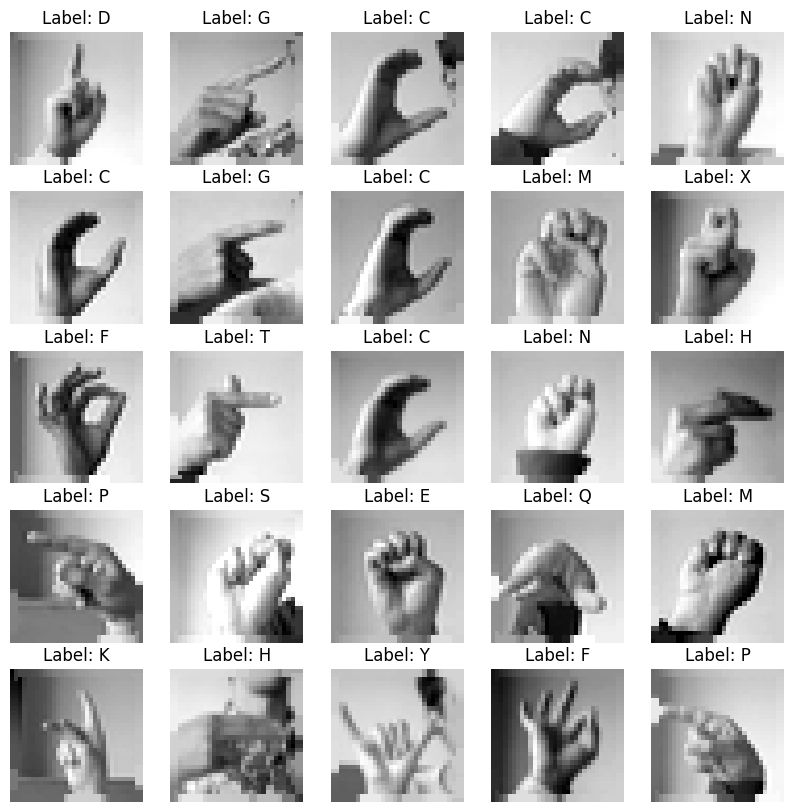

In [8]:
def display_sample_images(dataset, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(num_samples)):
        for j in range(num_samples):
            ax = plt.subplot(num_samples, num_samples, i * num_samples + j + 1)
            plt.imshow(images[j].numpy(), cmap='gray')
            
            label_value = int(labels[j].numpy())
            label_char = chr(label_value + ord('A'))  
            
            plt.title(f"Label: {label_char}")
            plt.axis('off')
    plt.show()

display_sample_images(train_dataset)

#### Baseline Model Training

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(25, activation='softmax')  
])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
Total params: 298521 (1.14 MB)
Trainable params: 298521 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = keras.callbacks.EarlyStopping(patience=10)


callbacks=[early_stopping, tensorboard]
baseline_model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
baseline_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,  
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100


I0000 00:00:1723571913.345998   14968 service.cc:146] XLA service 0x712cdc6c7f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723571913.346025   14968 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-08-13 13:58:33.351308: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 13:58:33.359918: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-13 13:58:33.368707: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

    827/Unknown - 1s 918us/step - loss: 2.0549 - accuracy: 0.3646

2024-08-13 13:58:34.366765: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-13 13:58:34.513381: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12010131797079615663
2024-08-13 13:58:34.513413: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 11511297893087389714
2024-08-13 13:58:34.513424: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 4175100409000529342


858/858 [==============================] - 2s 1ms/step - loss: 2.0292 - accuracy: 0.3717 - val_loss: 1.6726 - val_accuracy: 0.4529
Epoch 2/100
858/858 [==============================] - 1s 1ms/step - loss: 1.0628 - accuracy: 0.6577 - val_loss: 1.3876 - val_accuracy: 0.5399
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.6661 - accuracy: 0.7847 - val_loss: 1.2238 - val_accuracy: 0.6009
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.4344 - accuracy: 0.8617 - val_loss: 1.0623 - val_accuracy: 0.6645
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.9139 - val_loss: 0.9925 - val_accuracy: 0.7125
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.1927 - accuracy: 0.9433 - val_loss: 0.9859 - val_accuracy: 0.7387
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.1162 - accuracy: 0.9692 - val_loss: 1.0688 - val_accuracy: 0.7482
Epoch 8/100

#### Learning Curves using TensorBoard

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4782), started 0:08:28 ago. (Use '!kill 4782' to kill it.)

In [12]:
l1_regularizer = keras.regularizers.l1(0.001)

model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  
    keras.layers.Dense(256, activation='relu', kernel_regularizer=l1_regularizer),  
    keras.layers.Dense(128, activation='relu', kernel_regularizer=l1_regularizer),  
    keras.layers.Dense(25, activation='softmax')  
])

model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
Total params: 298521 (1.14 MB)
Trainable params: 298521 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
callbacks_2 = callbacks.copy()
adam = keras.optimizers.Adam(learning_rate=0.0008)
model_2.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_2.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,  
    verbose=1,
    callbacks=callbacks_2
)

In [9]:
# class OneCycleScheduler(tf.keras.callbacks.Callback):
#     def __init__(self, max_lr, total_steps, start_lr=None, last_lr=None):
#         super(OneCycleScheduler, self).__init__()
#         self.max_lr = max_lr
#         self.total_steps = total_steps
#         self.start_lr = start_lr or max_lr / 10
#         self.last_lr = last_lr or self.start_lr / 100
#         self.step = 0
        
#     def on_train_begin(self, logs=None):
#         # Initial learning rate
#         tf.keras.backend.set_value(self.model.optimizer.lr, self.start_lr)
    
#     def on_batch_end(self, batch, logs=None):
#         # Learning rate for the current step
#         self.step += 1
#         lr = self.calculate_lr()
#         tf.keras.backend.set_value(self.model.optimizer.lr, lr)
    
#     def calculate_lr(self):
#         # Phase 1: Increase learning rate
#         if self.step < self.total_steps // 2:
#             return self.start_lr + (self.max_lr - self.start_lr) * self.step / (self.total_steps // 2)
#         # Phase 2: Decrease learning rate
#         else:
#             return self.max_lr - (self.max_lr - self.last_lr) * (self.step - self.total_steps // 2) / (self.total_steps // 2)
    
#     def on_train_end(self, logs=None):
        # tf.keras.backend.set_value(self.model.optimizer.lr, self.start_lr)


In [34]:
l1_regularizer = keras.regularizers.l1(0.0005)

model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  
    keras.layers.Dense(300, activation='relu', kernel_regularizer=l1_regularizer),  
    keras.layers.Dense(300, activation='relu', kernel_regularizer=l1_regularizer),  
    keras.layers.Dense(25, activation='softmax')  
])

model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 300)               307500    
                                                                 
 dense_34 (Dense)            (None, 300)               90300     
                                                                 
 dense_35 (Dense)            (None, 25)                7525      
                                                                 
Total params: 405325 (1.55 MB)
Trainable params: 405325 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)
adam_2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_3.compile(optimizer=adam_2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,
    callbacks=callbacks_2
)

Looking at our learning curves above, L1 Regularized model isn't performing any better than our unregularized model. The extent of overfitting is still huge, and we need to resort to other regularization techniques like **Dropout**. I shall also introduce **Batch Normalization** to speed up the training.

In [24]:
model_4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(390, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(25, activation='softmax')
])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 390)               399750    
                                                                 
 dropout_2 (Dropout)         (None, 390)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               78200     
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_4 (Dense)             (None, 25)                5025      
                                                                 
Total params: 482975 (1.84 MB)
Trainable params: 48297

In [25]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=6000,
#     decay_rate=0.95,
#     staircase=True)

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.5,  
    staircase=False  
)

adam_3 = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_4.compile(optimizer=adam_3, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,
    callbacks=callbacks_2
)

Epoch 1/100
858/858 [==============================] - 1s 1ms/step - loss: 2.0556 - accuracy: 0.3528 - val_loss: 1.6506 - val_accuracy: 0.4635
Epoch 2/100
  1/858 [..............................] - ETA: 2s - loss: 1.5643 - accuracy: 0.3750

2024-08-13 18:56:29.440099: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-08-13 18:56:29.440130: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 12928548483665287324
2024-08-13 18:56:29.440147: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 2002489744867085825
2024-08-13 18:56:29.586499: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 10153783695264448994
2024-08-13 18:56:29.586519: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 9797899111602208726


858/858 [==============================] - 1s 1ms/step - loss: 1.1345 - accuracy: 0.6149 - val_loss: 1.2252 - val_accuracy: 0.5825
Epoch 3/100
858/858 [==============================] - 1s 1ms/step - loss: 0.7568 - accuracy: 0.7419 - val_loss: 1.0624 - val_accuracy: 0.6573
Epoch 4/100
858/858 [==============================] - 1s 1ms/step - loss: 0.5624 - accuracy: 0.8067 - val_loss: 0.8735 - val_accuracy: 0.7044
Epoch 5/100
858/858 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.8488 - val_loss: 0.9304 - val_accuracy: 0.7041
Epoch 6/100
858/858 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8793 - val_loss: 0.8321 - val_accuracy: 0.7362
Epoch 7/100
858/858 [==============================] - 1s 1ms/step - loss: 0.2879 - accuracy: 0.9018 - val_loss: 0.8875 - val_accuracy: 0.7535
Epoch 8/100
858/858 [==============================] - 1s 1ms/step - loss: 0.2487 - accuracy: 0.9149 - val_loss: 0.9026 - val_accuracy: 0.7351
Epoch 9/100

In [22]:
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter

def evaluate_model_performance(model, dataset):
    # Prepare lists to store true labels and predictions
    true_labels = []
    predictions = []

    # Iterate over the dataset to get predictions
    for batch in dataset:
        images, labels = batch
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)  # Convert predictions to class labels
        
        true_labels.extend(labels.numpy().flatten())  # Flatten to ensure it's 1D
        predictions.extend(preds.flatten())  # Flatten to ensure it's 1D

    true_labels = np.array(true_labels)
    predictions = np.array(predictions)

    # Calculate individual accuracies for each letter
    unique_labels = np.unique(true_labels)
    individual_accuracies = {}
    
    for label in unique_labels:
        label_mask = (true_labels == label)
        accuracy = accuracy_score(true_labels[label_mask], predictions[label_mask])
        individual_accuracies[chr(int(label) + ord('A'))] = accuracy
    
    # Overall mean accuracy
    overall_mean_accuracy = accuracy_score(true_labels, predictions)
    
    # Unbiased median accuracy
    median_accuracy = np.median(list(individual_accuracies.values()))
    
    # Highest and lowest individual accuracy
    highest_accuracy = max(individual_accuracies.values())
    lowest_accuracy = min(individual_accuracies.values())
    
    highest_accuracy_letter = max(individual_accuracies, key=individual_accuracies.get)
    lowest_accuracy_letter = min(individual_accuracies, key=individual_accuracies.get)
    
    # Identify the three most common single types of errors
    errors = [(true, pred) for true, pred in zip(true_labels, predictions) if true != pred]
    common_errors = Counter(errors).most_common(3)
    
    # Convert numeric labels to letters for errors
    common_errors_letters = [
        (chr(int(true_label) + ord('A')), chr(int(pred_label) + ord('A')), count)
        for (true_label, pred_label), count in common_errors
    ]
    
    return {
        "overall_mean_accuracy": overall_mean_accuracy,
        "median_accuracy": median_accuracy,
        "highest_accuracy": highest_accuracy,
        "highest_accuracy_letter": highest_accuracy_letter,
        "lowest_accuracy": lowest_accuracy,
        "lowest_accuracy_letter": lowest_accuracy_letter,
        "individual_accuracies": individual_accuracies,
        "common_errors": common_errors_letters
    }

In [26]:
metrics_1 = evaluate_model_performance(model_4, valid_dataset)

1/1 [==============================] - 0s 22ms/step


In [27]:
metrics_1

{'overall_mean_accuracy': 0.8195761293920804,
 'median_accuracy': 0.846389806512506,
 'highest_accuracy': 1.0,
 'highest_accuracy_letter': 'A',
 'lowest_accuracy': 0.5,
 'lowest_accuracy_letter': 'V',
 'individual_accuracies': {'A': 1.0,
  'B': 0.9318181818181818,
  'C': 0.9935897435897436,
  'D': 0.9067796610169492,
  'E': 1.0,
  'F': 0.9274193548387096,
  'G': 0.8536585365853658,
  'H': 0.958904109589041,
  'I': 0.5970149253731343,
  'K': 0.7602339181286549,
  'L': 1.0,
  'M': 0.8461538461538461,
  'N': 0.5214285714285715,
  'O': 0.7244094488188977,
  'P': 1.0,
  'Q': 0.8395061728395061,
  'R': 0.5714285714285714,
  'S': 0.7314814814814815,
  'T': 0.696969696969697,
  'U': 0.5227272727272727,
  'V': 0.5,
  'W': 0.6,
  'X': 0.9407407407407408,
  'Y': 0.8466257668711656},
 'common_errors': [('V', 'W', 50), ('T', 'X', 25), ('U', 'K', 25)]}

### CNN

Since our models above with 200-300K parameters are overfitting, it is unreasonable to increase the number of parameters. However, reducing the number of parameters would lead to underfitting (check the table at the bottom). Plus, we are restricted by the 50-run requirements, so I shall try to use our knowledge from previous runs to get a CNN working in the first run itself without needing to finetune - by limiting the number of total parameters and appying Dropout right away.

In [10]:
model_5 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((3, 3)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(64, (2, 2), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 10, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 64)          0

In [15]:
adam_4 = keras.optimizers.Adam(learning_rate=lr_schedule)   # Same Power Scheduler from previous run
model_5.compile(optimizer=adam_4,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_history = model_5.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,  
    verbose=1,
    callbacks=callbacks_2
)

In [ ]:
metrics_2 = evaluate_model_performance(model_5, test_dataset)

In [40]:
metrics_2['individual_accuracies']

{'A': 1.0,
 'B': 1.0,
 'C': 1.0,
 'D': 1.0,
 'E': 1.0,
 'F': 1.0,
 'G': 0.9130434782608695,
 'H': 1.0,
 'I': 0.9545454545454546,
 'K': 0.96875,
 'L': 1.0,
 'M': 0.9296482412060302,
 'N': 0.9933774834437086,
 'O': 0.9243697478991597,
 'P': 1.0,
 'Q': 1.0,
 'R': 1.0,
 'S': 0.8695652173913043,
 'T': 0.7241379310344828,
 'U': 0.917910447761194,
 'V': 0.974025974025974,
 'W': 1.0,
 'X': 1.0,
 'Y': 0.9053254437869822}

In [37]:
for key, value in metrics_2.items():
    if not key == 'individual_accuracies':
        print(key, value)

overall_mean_accuracy 0.9629113218070273
median_accuracy 1.0
highest_accuracy 1.0
highest_accuracy_letter A
lowest_accuracy 0.7241379310344828
lowest_accuracy_letter T
common_errors [('T', 'H', 17), ('G', 'H', 16), ('S', 'E', 14)]


1/1 [==============================] - 0s 8ms/step


2024-08-13 19:14:11.844088: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


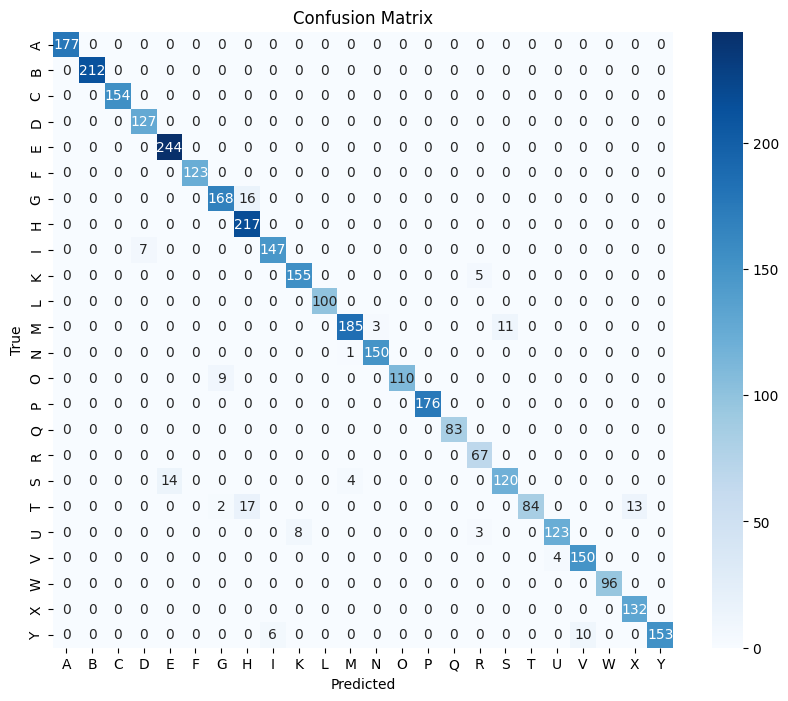

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, dataset, class_names):
    true_labels = []
    predictions = []

    for batch in dataset:
        images, labels = batch
        preds = model.predict(images)
        preds = np.argmax(preds, axis=1)  
        true_labels.extend(labels.numpy().flatten())
        predictions.extend(preds.flatten())

    # Filter out J (index 9) and Z (index 25) from the labels and predictions
    valid_indices = [i for i in range(len(true_labels)) if true_labels[i] != 9 and true_labels[i] != 25]
    true_labels = np.array(true_labels)[valid_indices]
    predictions = np.array(predictions)[valid_indices]

    # Adjust labels for confusion matrix plotting
    true_labels = [label - 1 if label > 9 else label for label in true_labels]
    predictions = [label - 1 if label > 9 else label for label in predictions]

    cm = confusion_matrix(true_labels, predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

class_names = [chr(i) for i in range(ord('A'), ord('Z') + 1) if chr(i) not in ['J', 'Z']]
plot_confusion_matrix(model_5, test_dataset, class_names)

For the sake of cleanliness, I have deleted some cells with previous runs that didn't (or did) work out so well. Here is a summary of all the training runs:<br>

| **Run** | **Model Architecture**                       | **Optimizer** |**Additional Info**| **Initial Learning Rate** | **Epochs** | **Best Validation Accuracy** |
|---------|----------------------------------------------|---------------|-----|--------------|------------|-----------------------------|
| 1       | Flatten() - Dense(256) - Dense(128) - Output() | Adam         | -- | 0.001             | 16         | 0.79                        |
| 2       | Flatten() - Dense(256) - Dense(238) - Output() | Adam         | -- | 0.001 (7 Epochs), then 0.0005 (7 Epochs)           | 14   | 0.79 |
| 3       | Flatten() - Dense(300) - Dense(120) - Output() | Adam         | L1 Regularization 0.001 + Exponential Scaling | 0.0005 (15 Epochs), then 0.00005 (7 Epochs)        | 22   | 0.69 |
| 4       | Conv2D(32) - MaxPooling2D(3x3)-Conv2D(64)-MaxPooling2D(2x2)-Conv2D(128)-Flatten()-Dense(64)-Output(26 softmax)| Adam        | Dropout 50 % + Power Scheduling | 0.001        | 23   | 0.96 |

'T' is the only character with unsatisfactory individual accuracy. The overall scores of our CNN are phenomenal and production-ready. The errors on 'T' are minor and can be addressed post-deployment with continous monitoring or through retraining as new data arrives. Apart from this, all the requirements of client are satisfied. Here are some of the problems I faced and strategies I used to overcome those:
1. The model architecture was quite restrictive and had to build one within the 500K limit, hence there was no scope of a third layer in the DNN. Although this wasn't a major hurdle as the dataset was quit small and probably didn't need a stronger model.
2. Almost all the models except our CNN were overfitting. I tried L1 Regularization, because I know by experience, most of the information in usual MNIST datasets can be explained by a smaller subset of features, and hence L1 could do good feature selection. However, this hypothesis failed in our model 2. Finally, I resorted to Dropout, and it was quite promising in each model I used.